<a href="https://colab.research.google.com/github/Arulpriya07/Array/blob/main/phishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import pandas as pd
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', names=['label', 'message'])
df.head()
X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
model = MultinomialNB()
model.fit(X_train_vec, y_train)
predictions = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, predictions))
def check_spam(msg):
    msg_vec = vectorizer.transform([msg])
    pred = model.predict(msg_vec)[0]
    return pred


test_msg ="congratulations you won a lottery"

print("Prediction:", check_spam(test_msg))


Accuracy: 0.9668161434977578
Prediction: spam


Text(0, 0.5, 'label')

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 145 (\x91) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarn

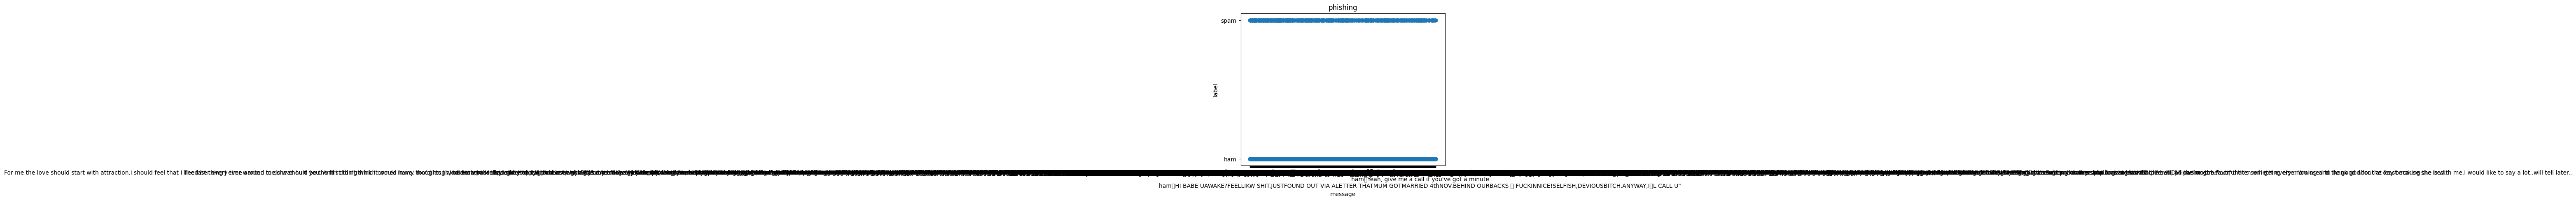

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', names=['label', 'message'])
plt.scatter(df['message'],df['label'])
plt.title("phishing")
plt.xlabel("message")
plt.ylabel("label")

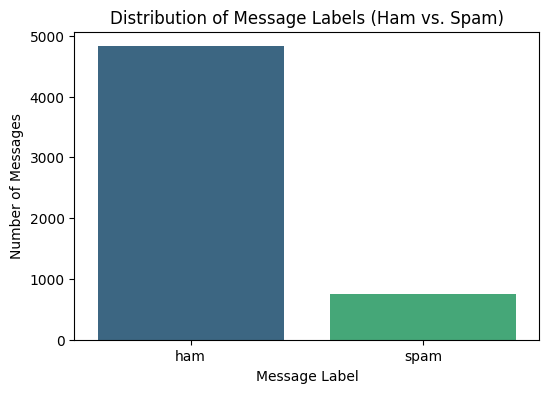

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (if df is not already available)
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', names=['label', 'message'])

# Create a countplot for the 'label' column
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, hue='label', legend=False, palette='viridis')
plt.title('Distribution of Message Labels (Ham vs. Spam)')
plt.xlabel('Message Label')
plt.ylabel('Number of Messages')
plt.show()